In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Import Plotly Express
from matplotlib.colors import ListedColormap

In [58]:
# LOADING CSV DATAFRAME INTO PANDAS DATAFRAME
df=pd.read_csv('heart.csv')

df['sex'] = df['sex'].replace({0: 'Female', 1: 'Male'})

In [59]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,0


In [60]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,Male,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,Male,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,Male,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,Female,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,Male,0,120,188,0,1,113,0,1.4,1,1,3,0


In [40]:
#no of rows and cols
df.shape

(1025, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


In [42]:
#Checking how many null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [43]:
df.isnull().sum().sum()

0

In [44]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
#Target variable is Heart Disease
#Checking distribution of target variable 
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [46]:
#Calculate summary statistics such as mean, median, mode, standard deviation, minimum, and maximum for numerical features 
#in your dataset. This will give you a general idea of the distribution of your data.

summary_stats = df.describe()

print(summary_stats)

               age           cp     trestbps        chol          fbs  \
count  1025.000000  1025.000000  1025.000000  1025.00000  1025.000000   
mean     54.434146     0.942439   131.611707   246.00000     0.149268   
std       9.072290     1.029641    17.516718    51.59251     0.356527   
min      29.000000     0.000000    94.000000   126.00000     0.000000   
25%      48.000000     0.000000   120.000000   211.00000     0.000000   
50%      56.000000     1.000000   130.000000   240.00000     0.000000   
75%      61.000000     2.000000   140.000000   275.00000     0.000000   
max      77.000000     3.000000   200.000000   564.00000     1.000000   

           restecg      thalach        exang      oldpeak        slope  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.529756   149.114146     0.336585     1.071512     1.385366   
std       0.527878    23.005724     0.472772     1.175053     0.617755   
min       0.000000    71.000000     0.000000  

In [47]:
#df.mode() calculates the mode for each column in your DataFrame. If there are multiple modes, it returns the smallest one.
mode_per_column = df.mode()
print(mode_per_column)

    age   sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  58.0  Male  0.0     120.0   204  0.0      1.0    162.0    0.0      0.0   
1   NaN   NaN  NaN       NaN   234  NaN      NaN      NaN    NaN      NaN   

   slope   ca  thal  target  
0    1.0  0.0   2.0     1.0  
1    NaN  NaN   NaN     NaN  


In [48]:
#iloc[0] is used to select the first row of the DataFrame returned by df.mode() because it returns a DataFrame where each 
#column contains the mode(s) for that column.

mode = df.mode().iloc[0]
print(mode)

age          58.0
sex          Male
cp            0.0
trestbps    120.0
chol          204
fbs           0.0
restecg       1.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        1.0
Name: 0, dtype: object


In [49]:
df.mode()

#You can also calculate mode separately for the entire DataFrame or individually for each column using df.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,Male,0.0,120.0,204,0.0,1.0,162.0,0.0,0.0,1.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# VISUALISATIONS 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


<Axes: xlabel='age', ylabel='Count'>

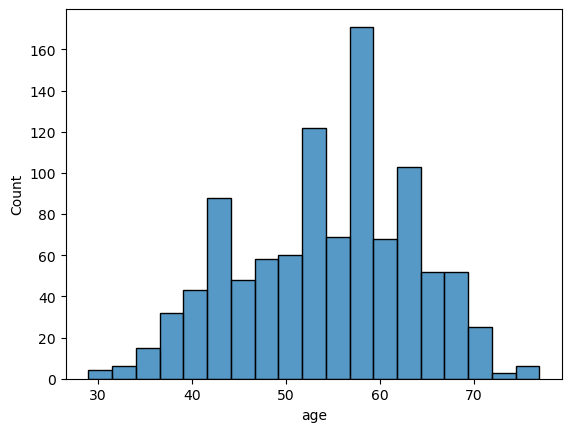

In [51]:
# Draw a histogram to see the distribution of the age column
sns.histplot(df['age'])

Mean 54.43414634146342
Median 56.0
Mode 0    58
Name: age, dtype: int64


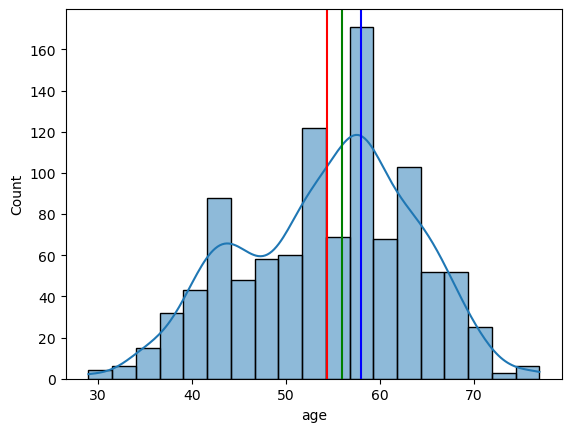

In [52]:
# Plot the mean, Median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='Red')
plt.axvline(df['age'].median(), color= 'Green')
plt.axvline(df['age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', df['age'].mean())
print('Median', df['age'].median())
print('Mode', df['age'].mode())

In [53]:
#Lets explore the gender base distribution of the dataset for age column
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [54]:
# Find the values of sex column
df['sex'].value_counts()


# Now, 0s are replaced with 'female' and 1s are replaced with 'male'



sex
Male      713
Female    312
Name: count, dtype: int64

In [55]:
# calculating the percentage fo male and female value counts in the data

male_count = 713
female_count = 312

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

# Difference
difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Males are {difference_percentage:.2f}% more than female in the data.')

Male percentage i the data: 69.56%
Female percentage in the data : 30.44%
Males are 128.53% more than female in the data.


In [56]:
# Find the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  62     24
        58     21
        63     17
        54     15
        55     15
               ..
Male    69      6
        29      4
        34      3
        37      3
        77      3
Name: count, Length: 73, dtype: int64

# CHEST PAIN COLUMN

In [61]:
# value count of cp column
df['cp'].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

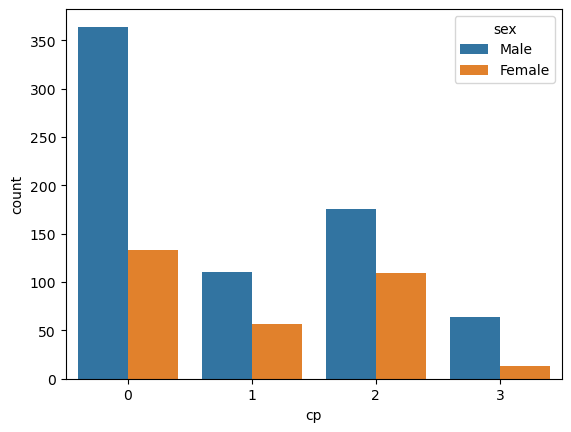

In [62]:
# count plot of cp column by sex column
sns.countplot(df, x='cp', hue= 'sex')

In [64]:
# Draw the plot of age column group by cp column

fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

# TRESTBPS Column

The normal resting blood pressure is 120/80 mm Hg.\ Write here, what will happen if the blood pressure is high or low and then you canbin the data based on the those values.

In [65]:
# lets summerize the trestbps column
df['trestbps'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

In [70]:
df['trestbps'].isnull().sum()

#NO MISSING VALUES


0

# DEALING WITH OUTLIERS


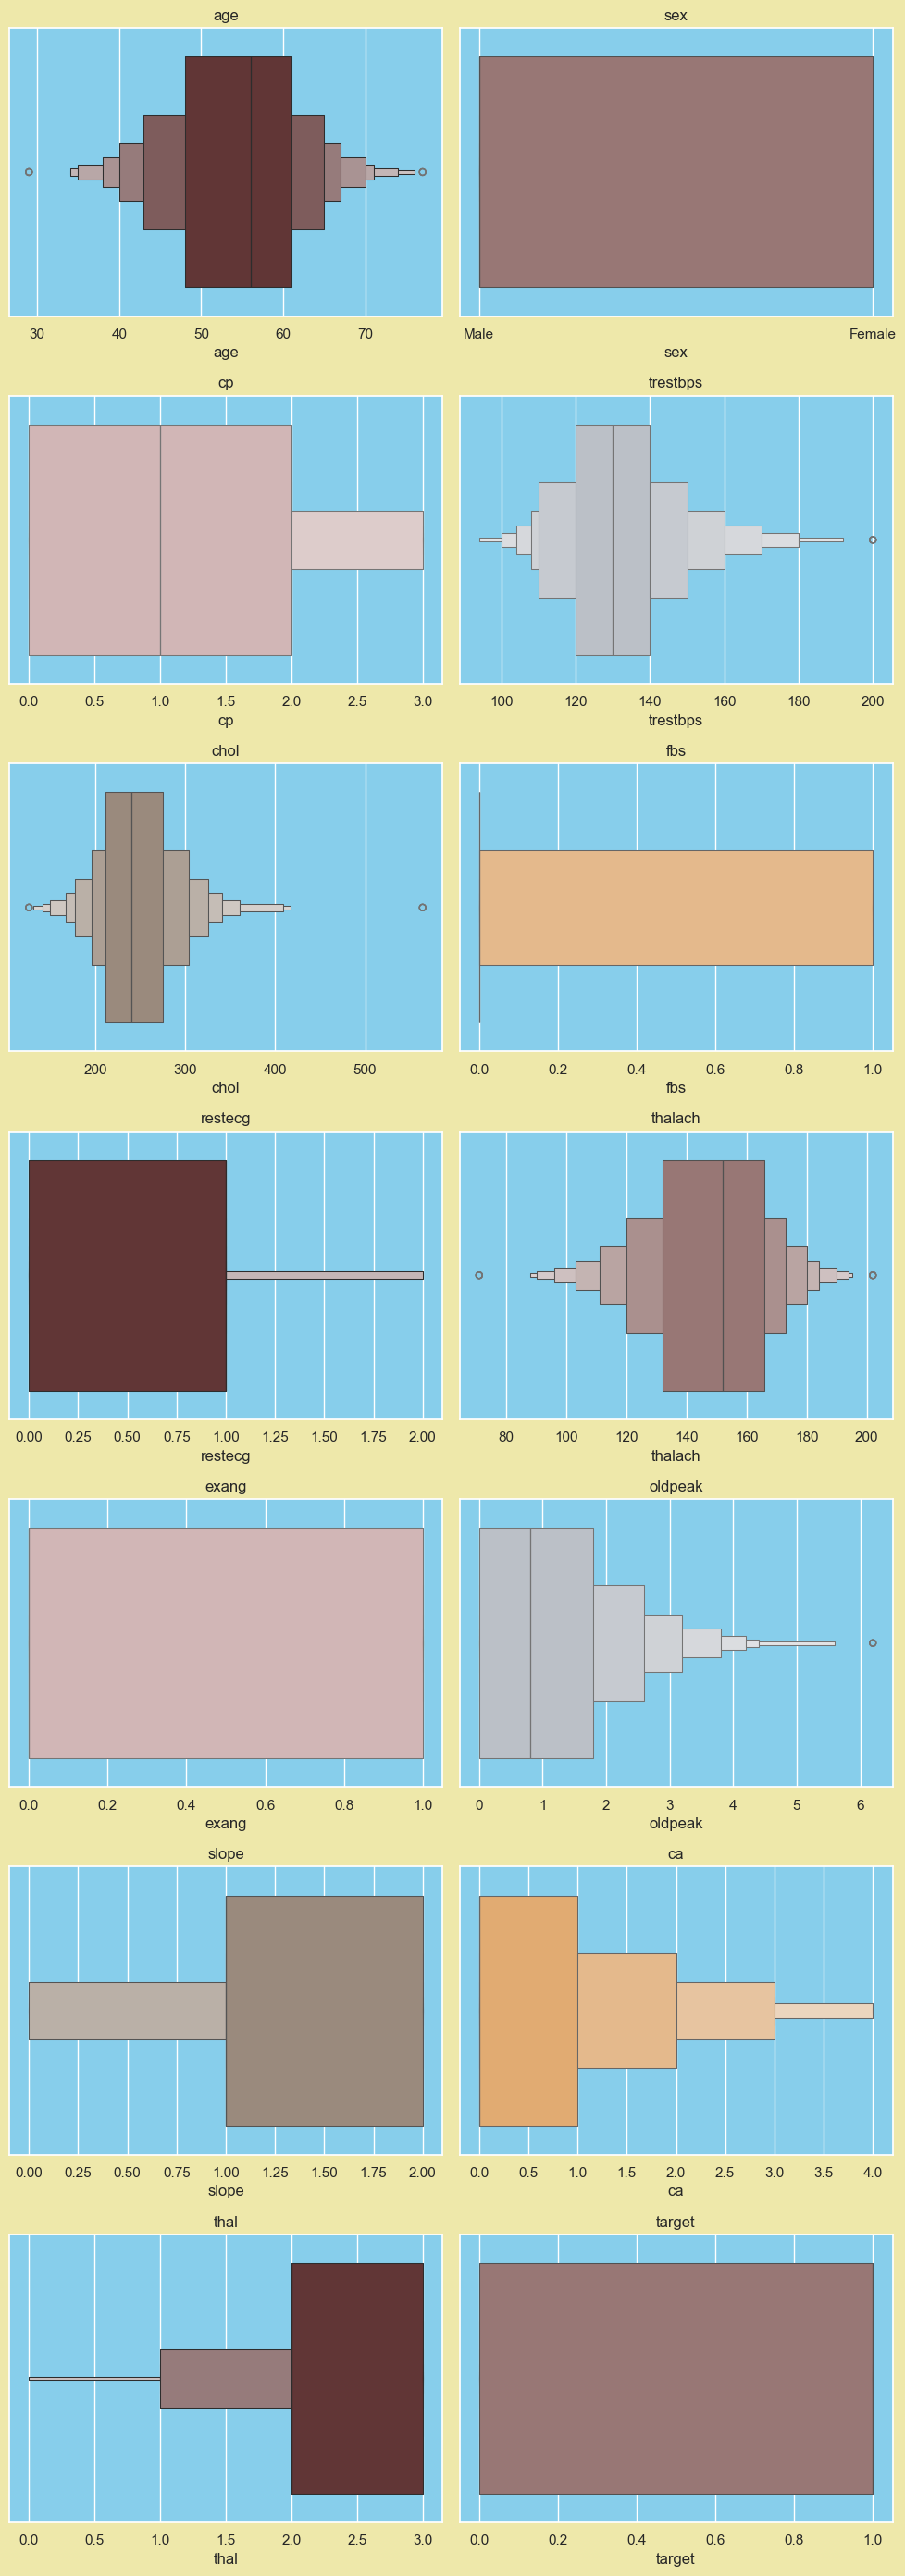

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})  # Change figure background color

palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed

plt.figure(figsize=(10, num_rows * 4))

for i, col in enumerate(df.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.boxenplot(x=df[col], color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(col)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



ANALYSIS OF PLOT
It seems there are outliers in the columns but we will examine it that its really the outliers or not because sometime these values come in outliers range but it really not.\ The outliers totally depends on the range which is different for every column in the dataset.

1. Handling Outliers in OldPeak column

In [85]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [87]:
# print the row from df where trestbps value is 0
df[df['trestbps']==6.200000]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# FINDING OUTLIERS
1. CHOL - AT AROUND 580
2. OLDPEAK - AT AROUND 6.2
3. TRESTBPS - AT AROUND 200
4. AGE - AT AROUND 28

# CHOLESTROL 

Z-Score Method
The z-score method is a statistical technique used to detect outliers by measuring how many standard deviations a data point is away from the mean. A z-score tells you how relatively far a data point is from the mean in terms of standard deviations

 First we will get the upper and lower limits

In [91]:
# find the limits
upper_limit = df['chol'].mean() + 3*df['chol'].std()
lower_limit = df['chol'].mean() - 3*df['chol'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 400.77753061854617
lower limit: 91.2224693814538


This code snippet calculates the upper limit as the mean plus three times the standard deviation (mean + 3 * std) and the lower limit as the mean minus three times the standard deviation (mean - 3 * std)

These limits define a range beyond which data points are considered outliers based on the z-score method

# find the outliers
df.loc[(df['chol'] > upper_limit) | (df['chol'] < lower_limit)]

Next we will trim the outliers. Trimming is a data transformation technique where outliers are removed or "trimmed" from the dataset, rather than replacing or imputing their values. Trimming involves setting a threshold or cutoff value, and any data points exceeding this threshold are removed from the dataset

In [93]:
# trimming - delete the outlier data
new_df = df.loc[(df['chol'] <= upper_limit) & (df['chol'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 1025
after removing outliers: 1012
outliers: 13


<Axes: ylabel='chol'>

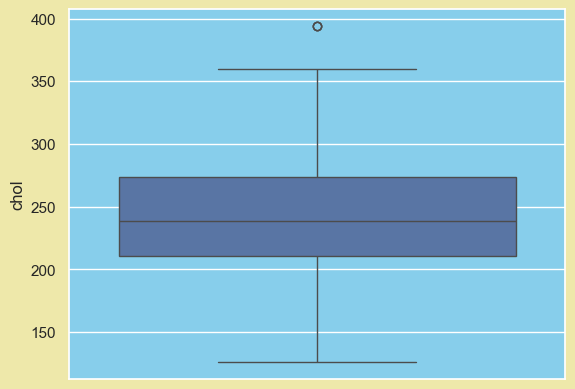

In [94]:
sns.boxplot(new_df['chol'])

# OLD PEAK


In [103]:
# find the limits
upper_limit = df['trestbps'].mean() + 3*df['chol'].std()
lower_limit = df['trestbps'].mean() - 3*df['chol'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 286.38923793561935
lower limit: -23.16582330147301


In [104]:
# find the outliers
df.loc[(df['trestbps'] > upper_limit) | (df['trestbps'] < lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [105]:
# trimming - delete the outlier data
new_df = df.loc[(df['chol'] <= upper_limit) & (df['chol'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 1025
after removing outliers: 824
outliers: 201


<Axes: ylabel='trestbps'>

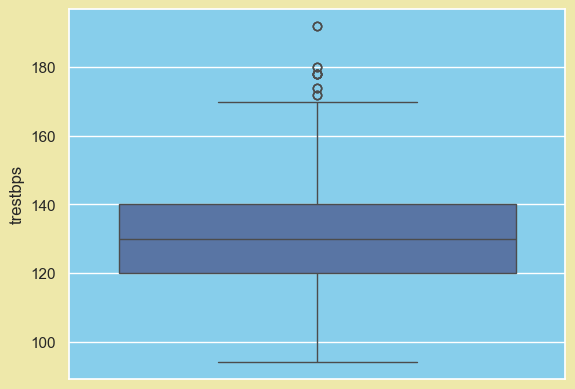

In [106]:
sns.boxplot(new_df['trestbps'])

# OUTLIERS IN AGE


In [107]:
df.age.describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

Minimum age is 31 to have chest pain which can be possible so its not an outlier.\ We have observed that the minimum age for experiencing chest pain is 31, any observation at this age wouldn't be considered an outlier within the context of age-related data. Outliers typically deviate significantly from the majority of observations, but in this case, 31 falls within the expected range for experiencing chest pain.
max age is 77 which is also possible so its not an outlier as well.\ The maximum age for experiencing chest pain is 77, any observation at this age wouldn't be classified as an outlier within the dataset. Outliers are typically defined as values that significantly deviate from the majority, but in this case, 77 falls within the expected range for chest pain occurrences.

# Handling trestbps column outliers

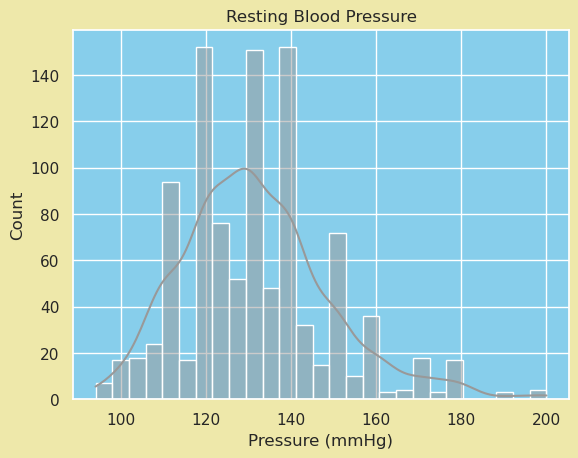

In [108]:
palette = ["#999999", "#666666", "#333333"]

sns.histplot(data=df, 
             x='trestbps', 
             kde=True,
             color=palette[0])

plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')

plt.style.use('default')
plt.rcParams['figure.facecolor'] = palette[1]
plt.rcParams['axes.facecolor'] = palette[2] 

<Axes: xlabel='trestbps', ylabel='Count'>

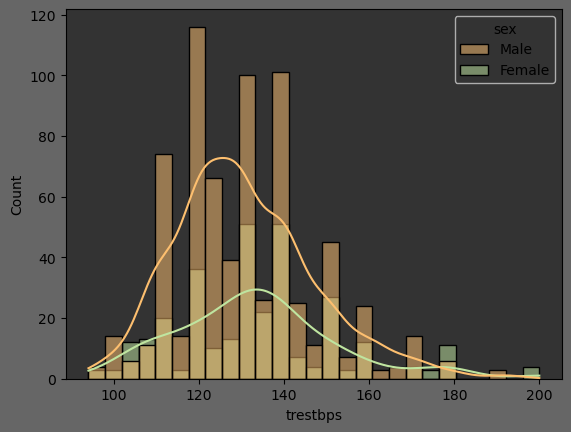

In [109]:
# create a histplot trestbops column to analyse with sex column
sns.histplot(df, x='trestbps', kde=True, palette = "Spectral", hue ='sex')

Analysis of plot
Everything seems ok and there is no outliers in the columns.
Columns are cleaned from outliers and missing values and we have already analysis the data.
The next step should be Model building.